In [21]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import ipt
import mxnet as mx
from intonet import *
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
load = ('./<12-11:58:45>fcn_train.py[E15]/[ACC-0.89621 E13]', 13)
from CNN.fcn_train import net
import my_utils as mu

iters= mu.get(bs=1,small=True, aug=True)


Data Shape, Train (504, 1, 256, 256), Val (9, 1, 256, 256)


In [3]:
train = iters['train']
img, ll = train.data[0][1], train.label[0][1]

train = mx.io.NDArrayIter(img[:100], ll[:100], batch_size=1)

In [4]:
out, img, ll, arg, aux = fetch_internal(net(), train, *load)


['data', 'conv1_weight', 'conv1_bias', 'conv1_output', 'batchnorm0_gamma', 'batchnorm0_beta', 'batchnorm0_output', 'activation0_output', 'conv2_weight', 'conv2_bias', 'conv2_output', 'batchnorm1_gamma', 'batchnorm1_beta', 'batchnorm1_output', 'activation1_output', 'pooling0_output', 'conv3_weight', 'conv3_bias', 'conv3_output', 'batchnorm2_gamma', 'batchnorm2_beta', 'batchnorm2_output', 'activation2_output', 'pooling1_output', 'conv4_weight', 'conv4_bias', 'conv4_output', 'batchnorm3_gamma', 'batchnorm3_beta', 'batchnorm3_output', 'activation3_output', 'pooling2_output', 'conv5_weight', 'conv5_bias', 'conv5_output', 'batchnorm4_gamma', 'batchnorm4_beta', 'batchnorm4_output', 'activation4_output', 'conv6_weight', 'conv6_bias', 'conv6_output', 'batchnorm5_gamma', 'batchnorm5_beta', 'batchnorm5_output', 'activation5_output', 'deconvolution0_weight', 'deconvolution0_output', 'conv7_weight', 'conv7_bias', 'conv7_output', 'batchnorm6_gamma', 'batchnorm6_beta', 'batchnorm6_output', 'activati

# In and Out

(64, 130, 130) (32, 260, 260)
0


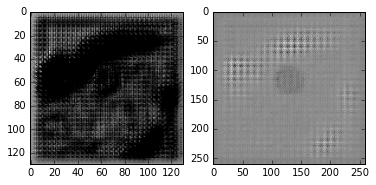

1


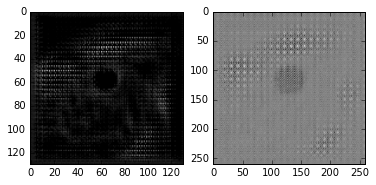

2


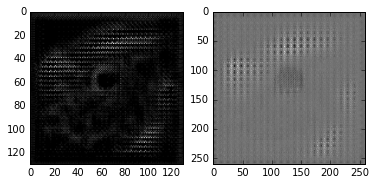

3


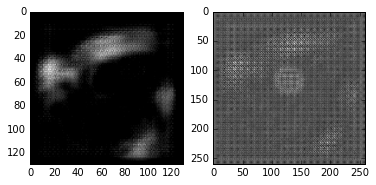

4


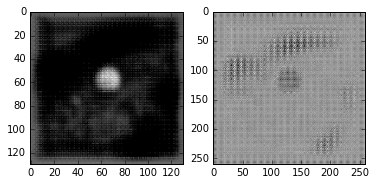

5


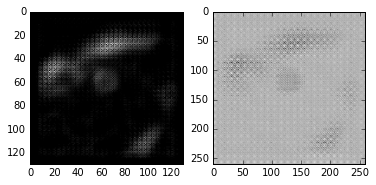

6


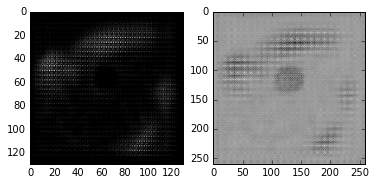

7


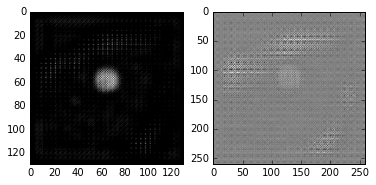

8


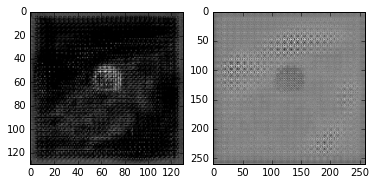

9


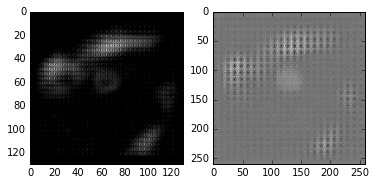

10


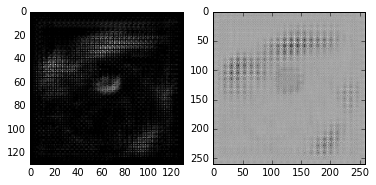

11


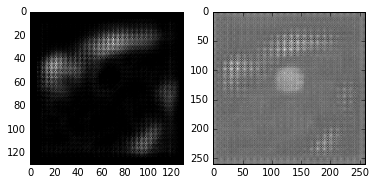

12


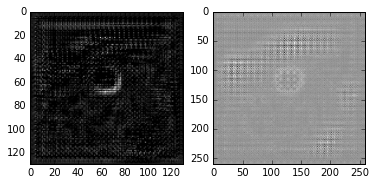

13


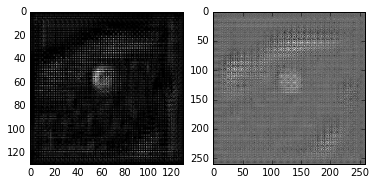

14


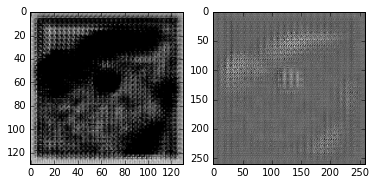

15


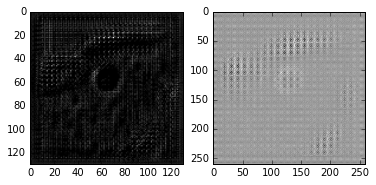

16


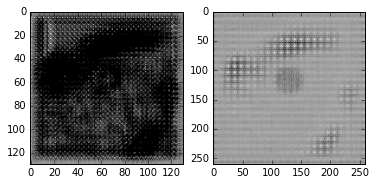

17


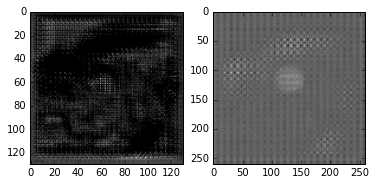

18


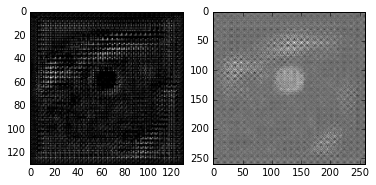

19


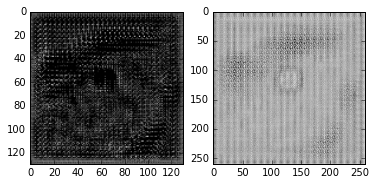

20


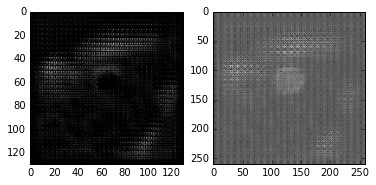

21


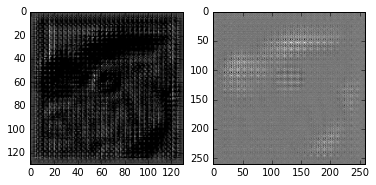

22


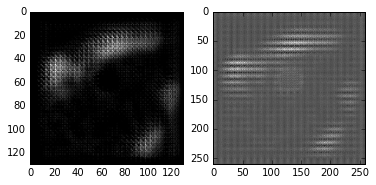

23


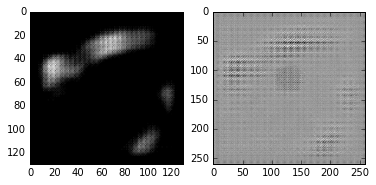

24


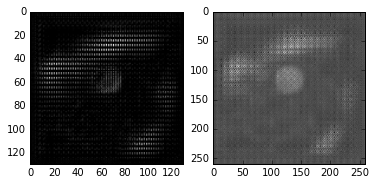

25


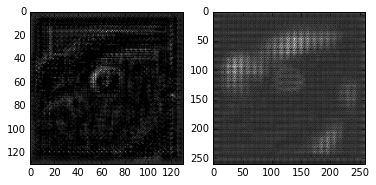

26


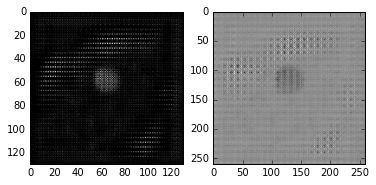

27


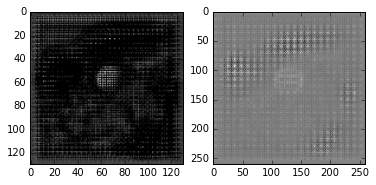

28


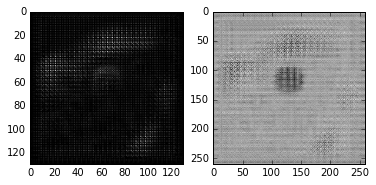

29


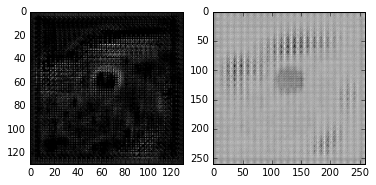

30


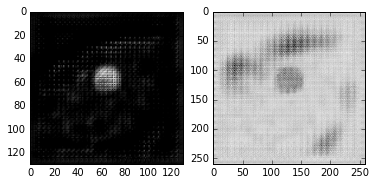

31


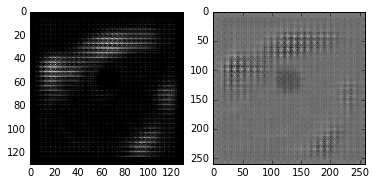

32


IndexError: index 32 is out of bounds for axis 0 with size 32

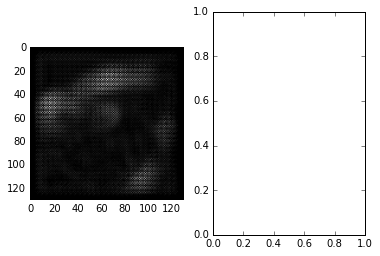

In [46]:
iii = out['deconvolution0'][0]
ooo =out['conv7'][0]
print ins.shape, outs.shape
F = ins.shape[0]
for i in range(F):
    print i
    fig, subs = plt.subplots(1,2)
    subs[0].imshow(ins[i], cmap='gray')
    subs[1].imshow(outs[i], cmap='gray')
    plt.show()
    fig.clear()

# Deconv

(64, 130, 130) (32, 260, 260)
0


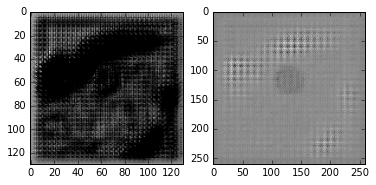

1


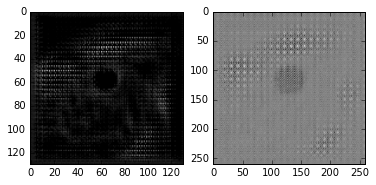

2


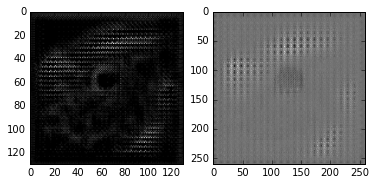

3


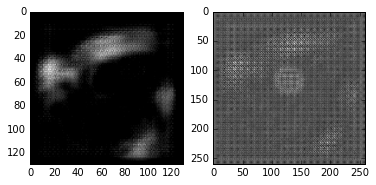

4


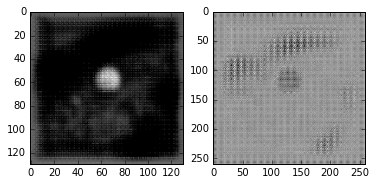

5


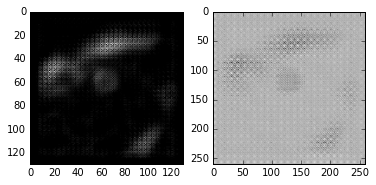

6


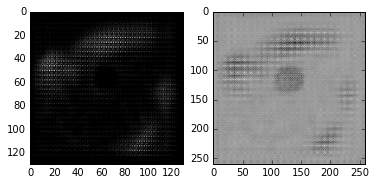

7


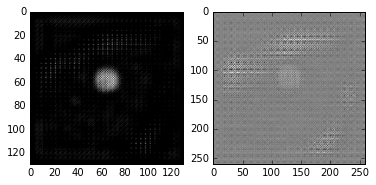

8


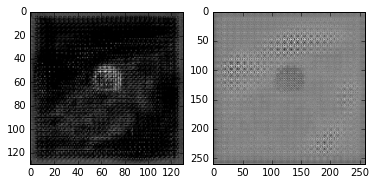

9


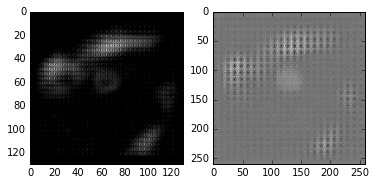

10


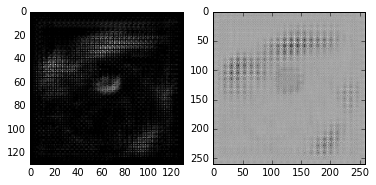

11


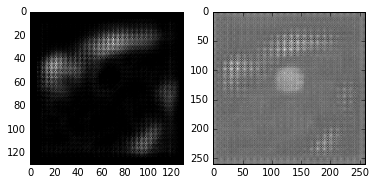

12


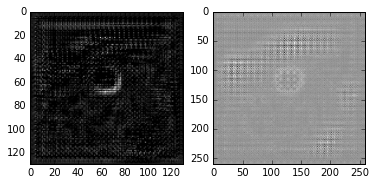

13


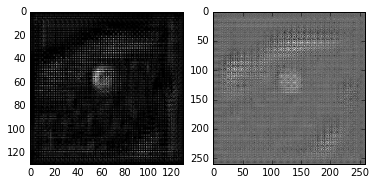

14


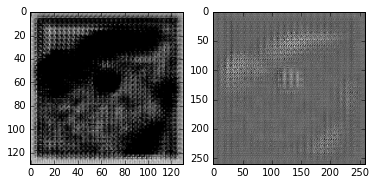

15


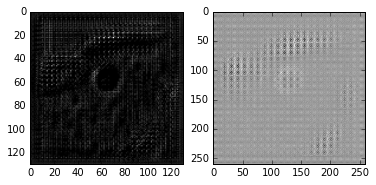

16


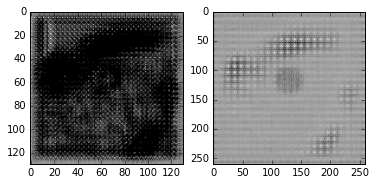

17


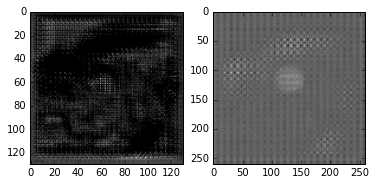

18


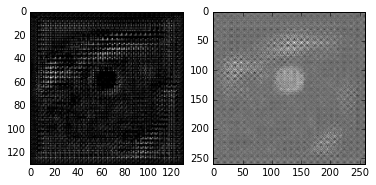

19


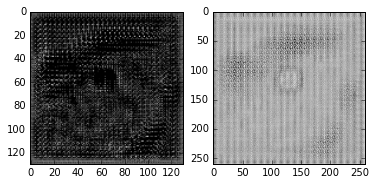

20


21


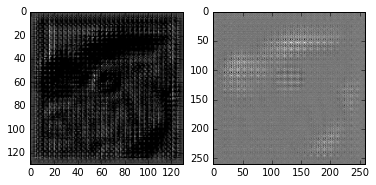

22


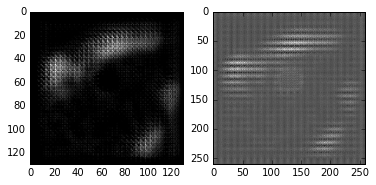

23


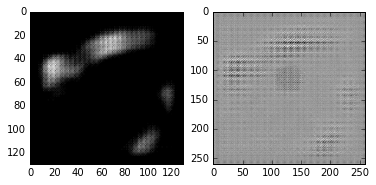

24


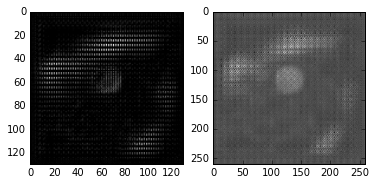

25


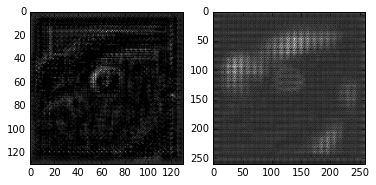

26


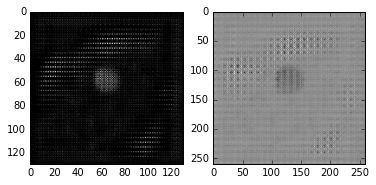

27


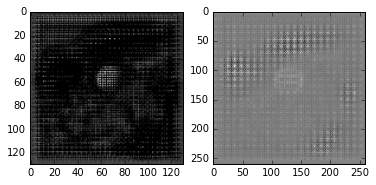

28


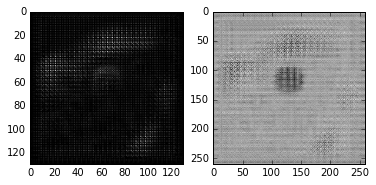

29


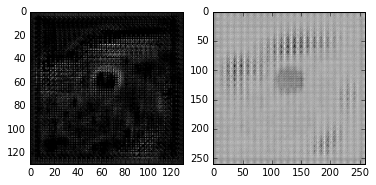

30


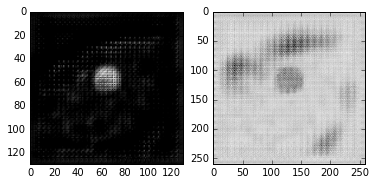

31


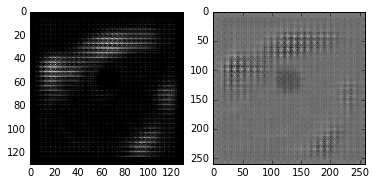

32


IndexError: index 32 is out of bounds for axis 0 with size 32

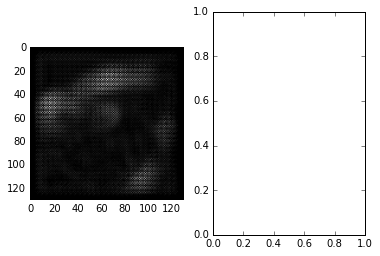

In [45]:
ins=out['activation7'][0]
outs=out['deconvolution2'][0]
print ins.shape, outs.shape
F = ins.shape[0]
for i in range(F):
    print i
    fig, subs = plt.subplots(1,2)
    subs[0].imshow(ins[i], cmap='gray')
    subs[1].imshow(outs[i], cmap='gray')
    plt.show()
    fig.clear()

# Filter

conv1_weight


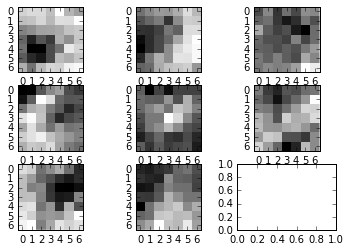

conv2_weight


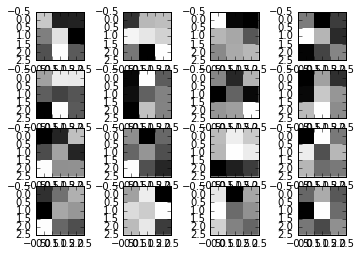

conv3_weight


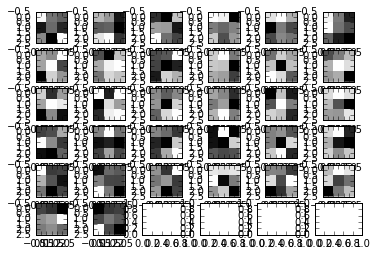

conv4_weight


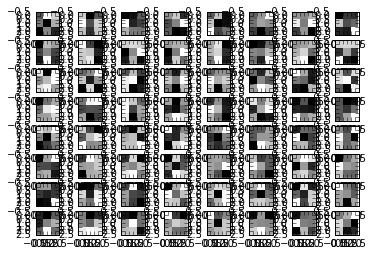

conv5_weight


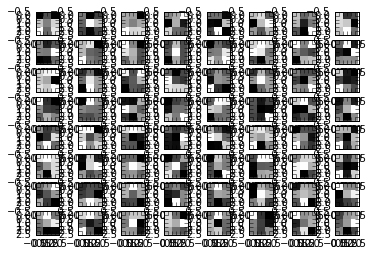

conv6_weight


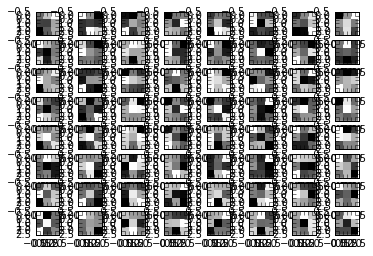

conv7_weight


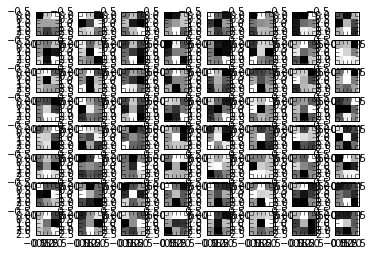

conv8_weight


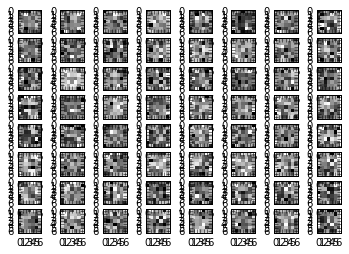

conv9_weight


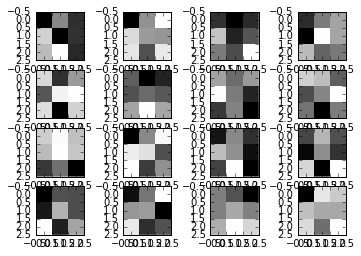

conv10_weight


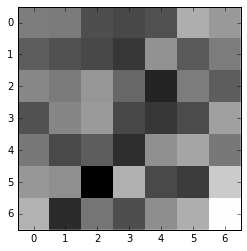

conv11_weight


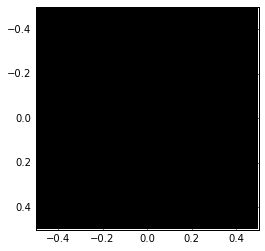

In [35]:
for i in range(1,12):
    weight = 'conv%d_weight'%i
    print weight
    filters = arg[weight]
    F = filters.shape[0]
    side = int(np.ceil(np.sqrt(F)))
    fig, subs = plt.subplots(side,side)
    subs = np.array([subs]) if not isinstance(subs, np.ndarray) else subs
    subs = subs.ravel()
    for i in range(F):
        subs[i].imshow(filters[i,0], cmap='gray', interpolation='none')
    plt.show()
    fig.clear()

# Activitation

activation1


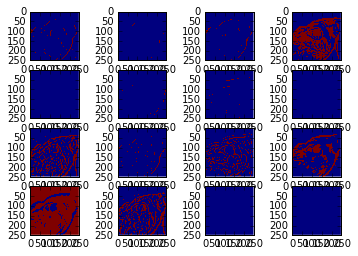

activation2


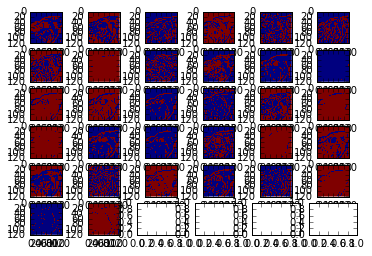

activation3


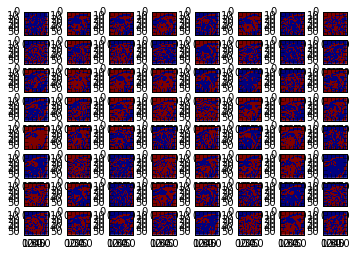

activation4


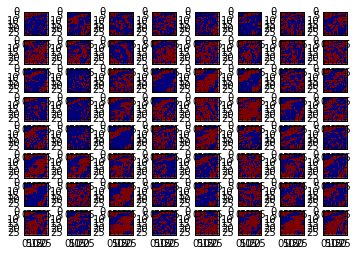

activation5


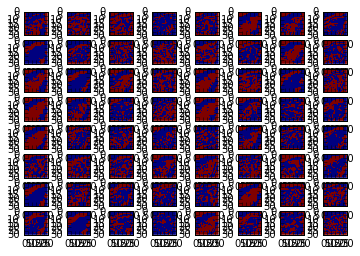

activation6


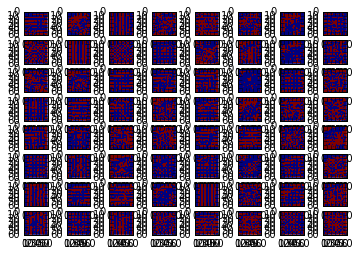

activation7


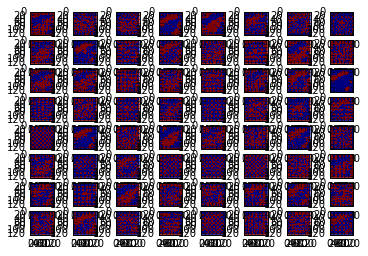

activation8


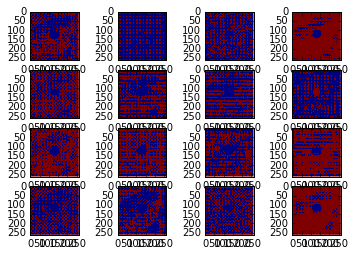

In [31]:
for j in range(1,9):
    layer = 'activation%d'%j
    print layer
    outputs = out[layer][0]
    F = outputs.shape[0]
    side = int(np.ceil(np.sqrt(F)))
    fig, subs = plt.subplots(side,side)
    subs = subs.ravel()
    for i in range(F):
        active = outputs[i]>0
        subs[i].imshow(active, interpolation='none')
    plt.show()
    fig.clear()

conv1
-8.5464


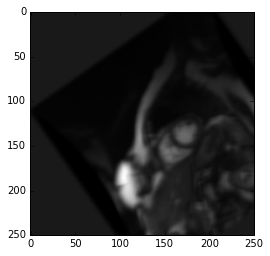

conv2
-1.29357


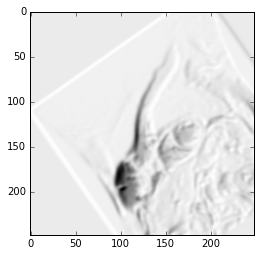

conv3
0.13007


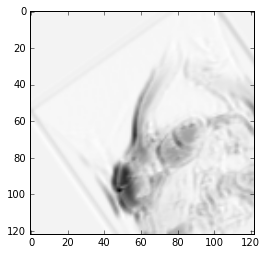

conv4
0.0380077


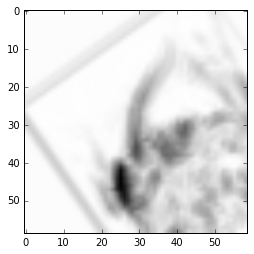

conv5
-0.307419


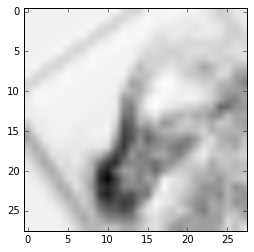

conv6
-0.568448


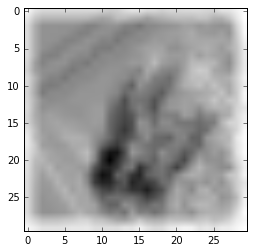

conv7
-0.00651387


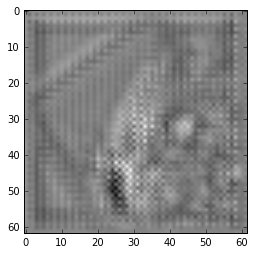

conv8
-0.0205149


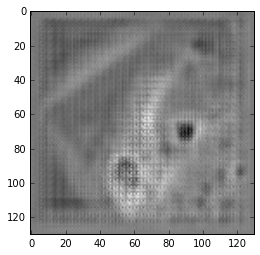

conv9
-1.9717


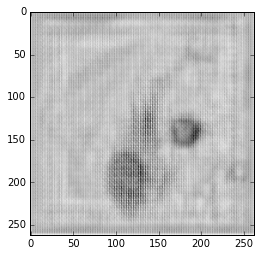

conv10
-13.9757


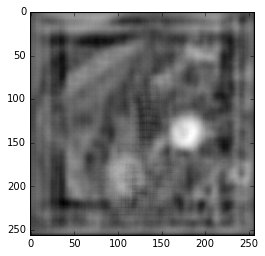

conv11
-14.7535


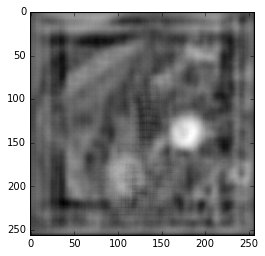

In [13]:
sample=3
for i in range(1,12):
    name = 'conv%d'%i
    print name
    array = out[name][sample].mean(axis=0)
    print array.mean()
    plt.imshow(array, cmap='gray')
    plt.show()